/tmp/ipykernel_4515/2192244694.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])


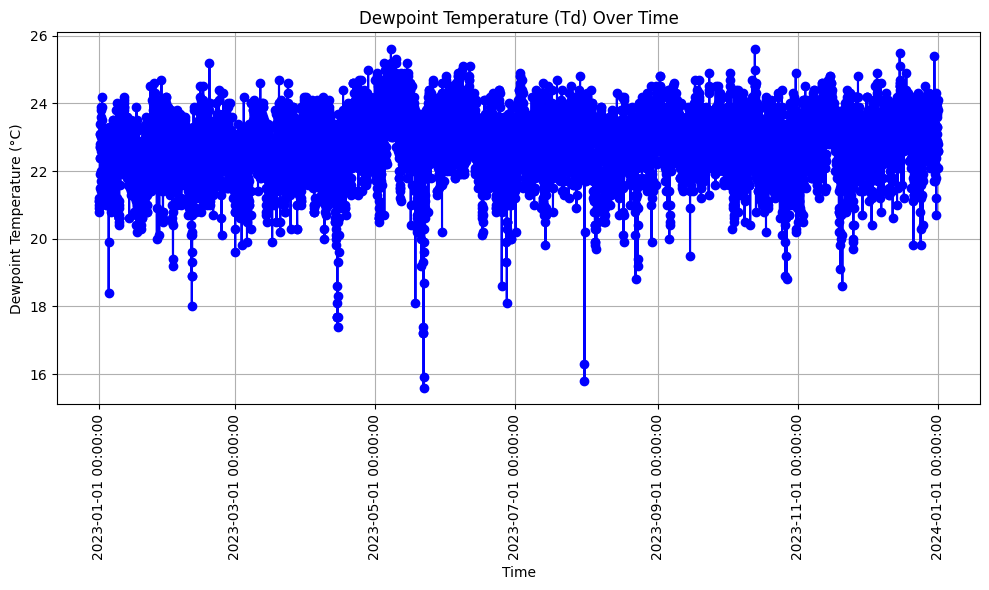

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'TEMP DEWPOINT C TDTDTD'])

# Convert the 'DATA TIMESTAMP' column to datetime format
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])

# Extract the dewpoint temperature (Td) and convert it to numeric, handling errors
df['TEMP DEWPOINT C TDTDTD'] = pd.to_numeric(df['TEMP DEWPOINT C TDTDTD'], errors='coerce')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['DATA TIMESTAMP'], df['TEMP DEWPOINT C TDTDTD'], marker='o', linestyle='-', color='blue')

# Formatting the plot
plt.title('Dewpoint Temperature (Td) Over Time')
plt.xlabel('Time')
plt.ylabel('Dewpoint Temperature (°C)')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m-%d %H:%M:%S"))

# Show grid
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [2]:
pip install windrose

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


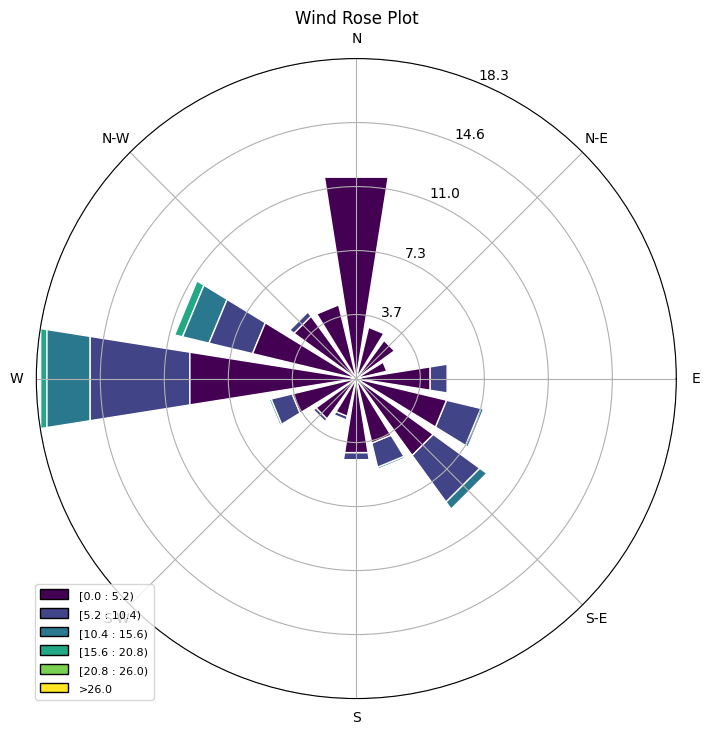

In [5]:
import pandas as pd
from windrose import WindroseAxes
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['WIND DIR DEG DD', 'WIND SPEED FF'])

# Clean the data: remove rows with missing or non-numeric values
df = df.dropna()
df['WIND DIR DEG DD'] = pd.to_numeric(df['WIND DIR DEG DD'], errors='coerce')
df['WIND SPEED FF'] = pd.to_numeric(df['WIND SPEED FF'], errors='coerce')
df = df.dropna()

# Convert wind direction and speed to numpy arrays
wind_direction = df['WIND DIR DEG DD'].values
wind_speed = df['WIND SPEED FF'].values

# Create a wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

plt.title('Wind Rose Plot')
plt.show()


/tmp/ipykernel_2727/4121273555.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])


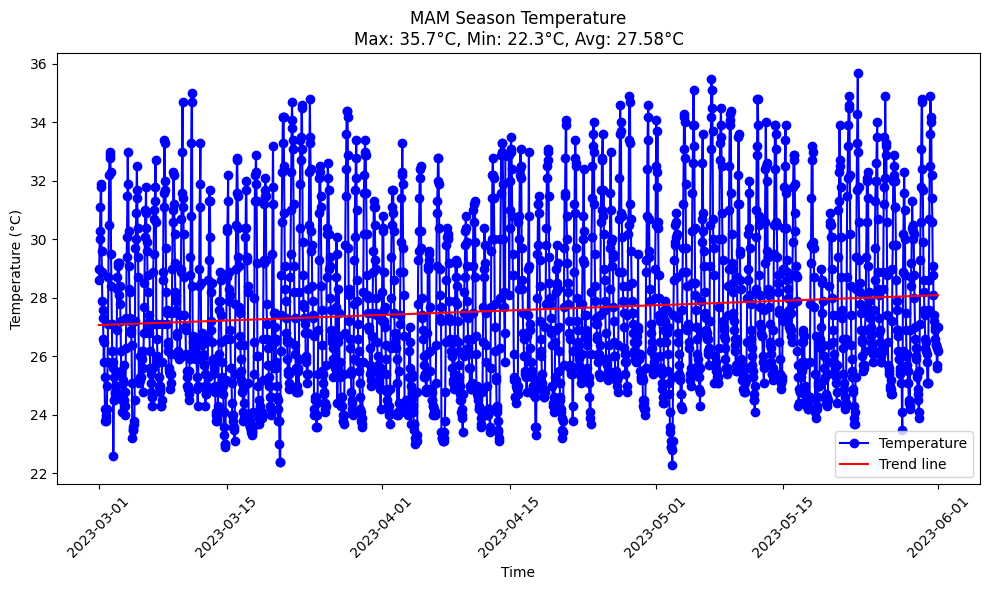

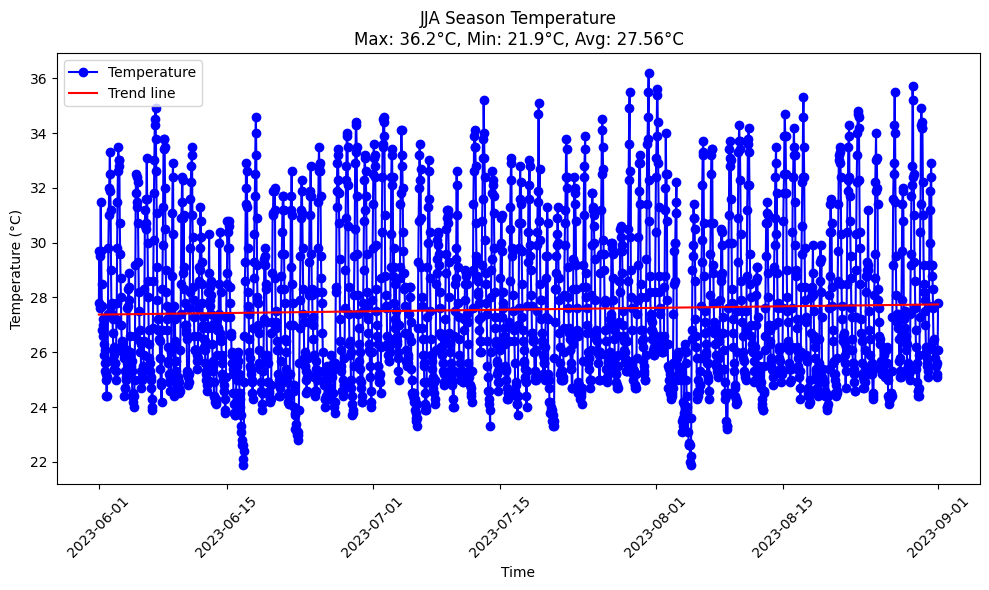

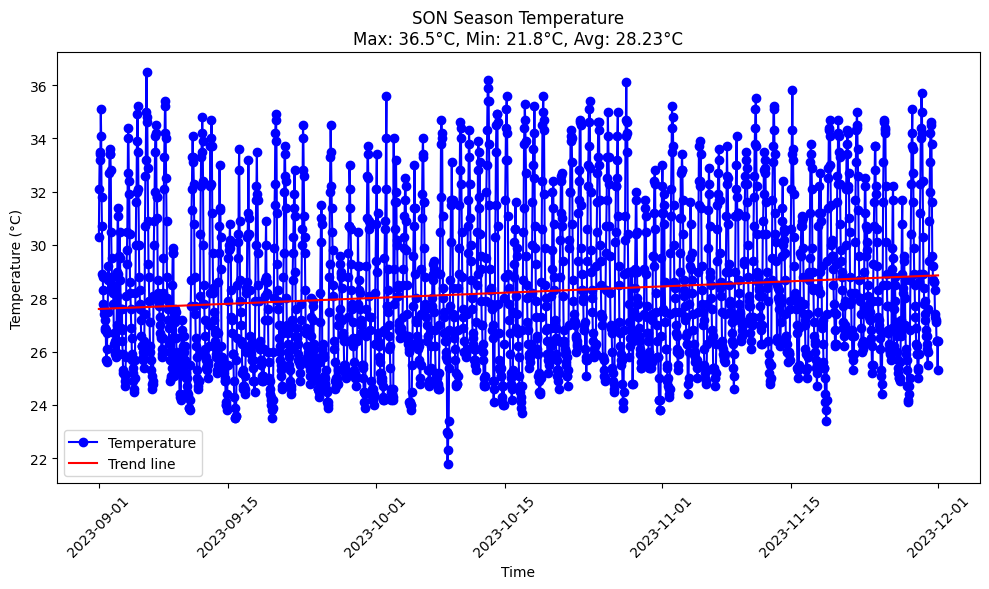

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'TEMP DRYBULB C TTTTTT'])

# Convert the 'DATA TIMESTAMP' column to datetime format and extract month
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])
df['Month'] = df['DATA TIMESTAMP'].dt.month

# Filter data for each season
mam = df[df['Month'].isin([3, 4, 5])]
jja = df[df['Month'].isin([6, 7, 8])]
son = df[df['Month'].isin([9, 10, 11])]

# Function to plot each season
def plot_season(season_df, season_name):
    plt.figure(figsize=(10, 6))
    plt.plot(season_df['DATA TIMESTAMP'], season_df['TEMP DRYBULB C TTTTTT'], label='Temperature', marker='o', linestyle='-', color='blue')
    
    # Calculate and plot trend line
    x = np.arange(len(season_df))
    y = season_df['TEMP DRYBULB C TTTTTT']
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot(season_df['DATA TIMESTAMP'], intercept + slope*x, 'r', label='Trend line')
    
    # Display properties
    max_temp = y.max()
    min_temp = y.min()
    avg_temp = y.mean()
    plt.title(f'{season_name} Season Temperature\nMax: {max_temp}°C, Min: {min_temp}°C, Avg: {avg_temp:.2f}°C')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot each season
plot_season(mam, 'MAM')
plot_season(jja, 'JJA')
plot_season(son, 'SON')



/tmp/ipykernel_2727/890778545.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])


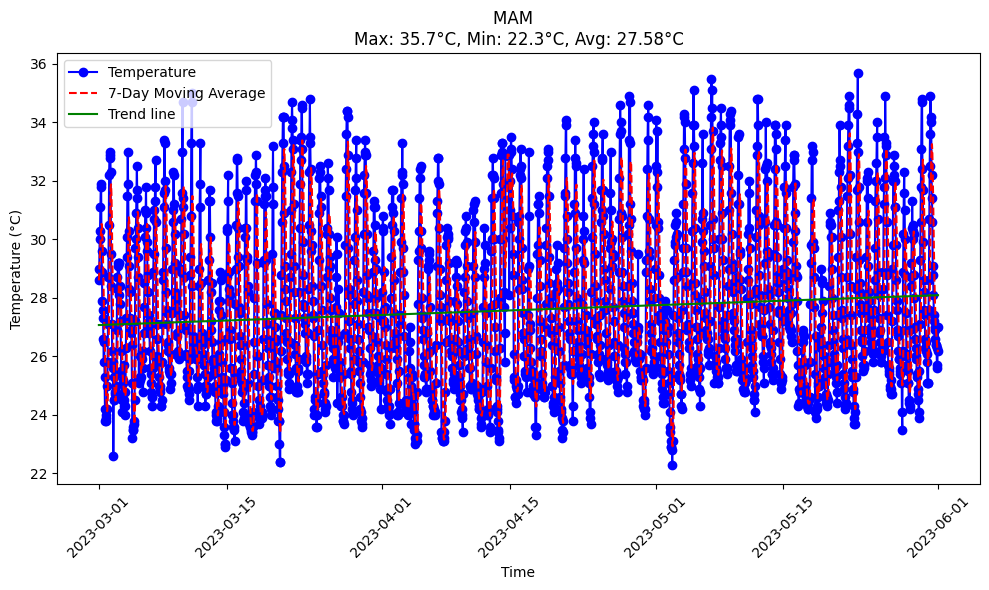

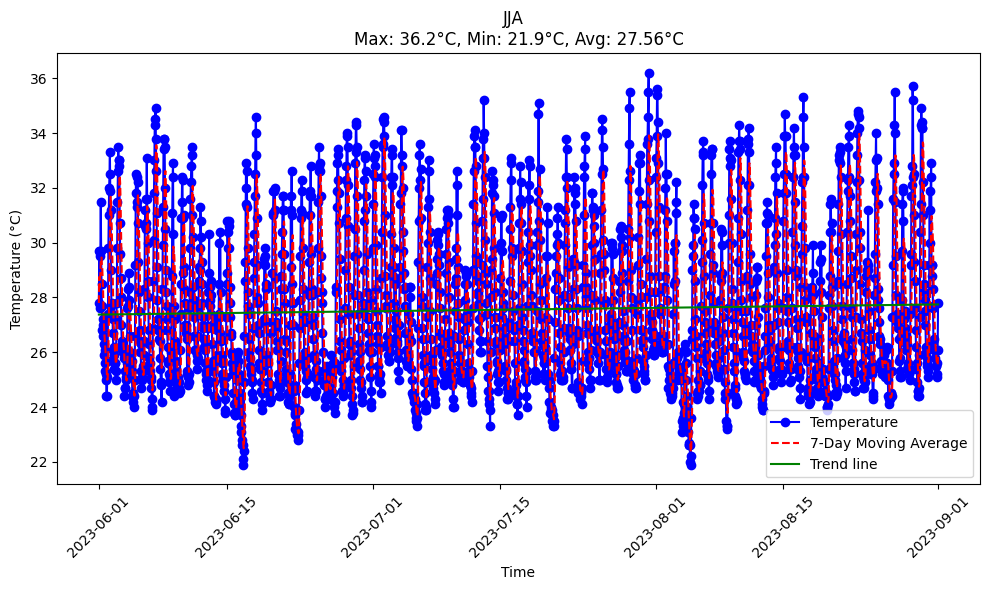

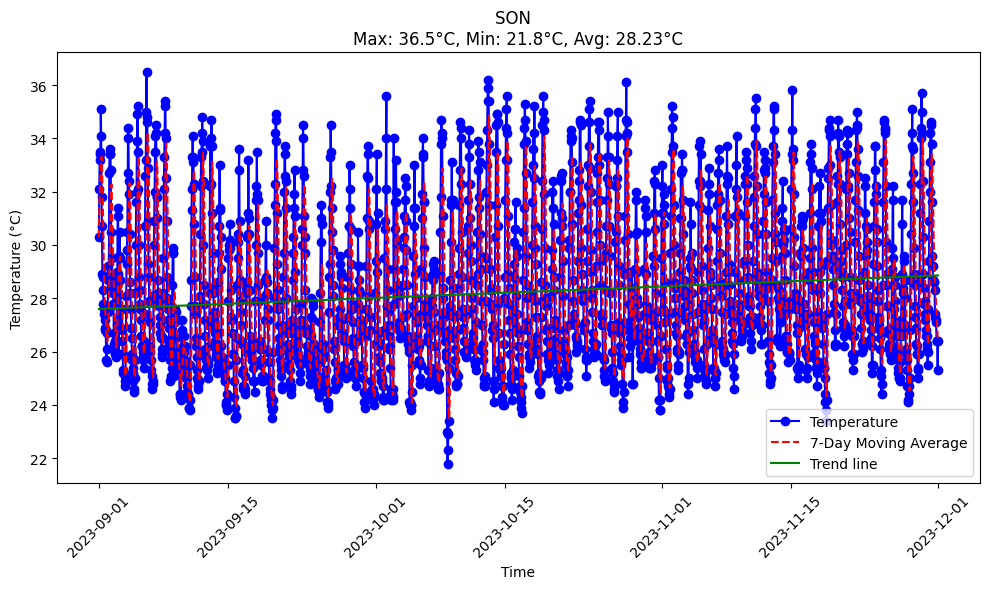

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'TEMP DRYBULB C TTTTTT'])

# Convert the 'DATA TIMESTAMP' column to datetime format and extract month
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])
df['Month'] = df['DATA TIMESTAMP'].dt.month

# Filter data for each season
mam = df[df['Month'].isin([3, 4, 5])]
jja = df[df['Month'].isin([6, 7, 8])]
son = df[df['Month'].isin([9, 10, 11])]

# Function to plot each season with moving average
def plot_season_with_moving_average(season_df, season_name):
    plt.figure(figsize=(10, 6))
    
    # Plot original temperature data
    plt.plot(season_df['DATA TIMESTAMP'], season_df['TEMP DRYBULB C TTTTTT'], label='Temperature', marker='o', linestyle='-', color='blue')
    
    # Calculate and plot 7-day moving average
    season_df.set_index('DATA TIMESTAMP', inplace=True)
    moving_avg = season_df['TEMP DRYBULB C TTTTTT'].rolling(window=7, min_periods=1).mean()
    plt.plot(moving_avg, label='7-Day Moving Average', linestyle='--', color='red')
    
    # Calculate and plot trend line
    season_df.reset_index(inplace=True)
    x = np.arange(len(season_df))
    y = season_df['TEMP DRYBULB C TTTTTT']
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot(season_df['DATA TIMESTAMP'], intercept + slope*x, 'g', label='Trend line')
    
    # Display properties
    max_temp = y.max()
    min_temp = y.min()
    avg_temp = y.mean()
    plt.title(f'{season_name}  \nMax: {max_temp}°C, Min: {min_temp}°C, Avg: {avg_temp:.2f}°C')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot each season with moving average
plot_season_with_moving_average(mam, 'MAM')
plot_season_with_moving_average(jja, 'JJA')
plot_season_with_moving_average(son, 'SON')


/tmp/ipykernel_2727/824439305.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])
/tmp/ipykernel_2727/824439305.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(monthly_data['DATA TIMESTAMP'], intercept + slope*x, 'r', label='Trend line', color='purple')


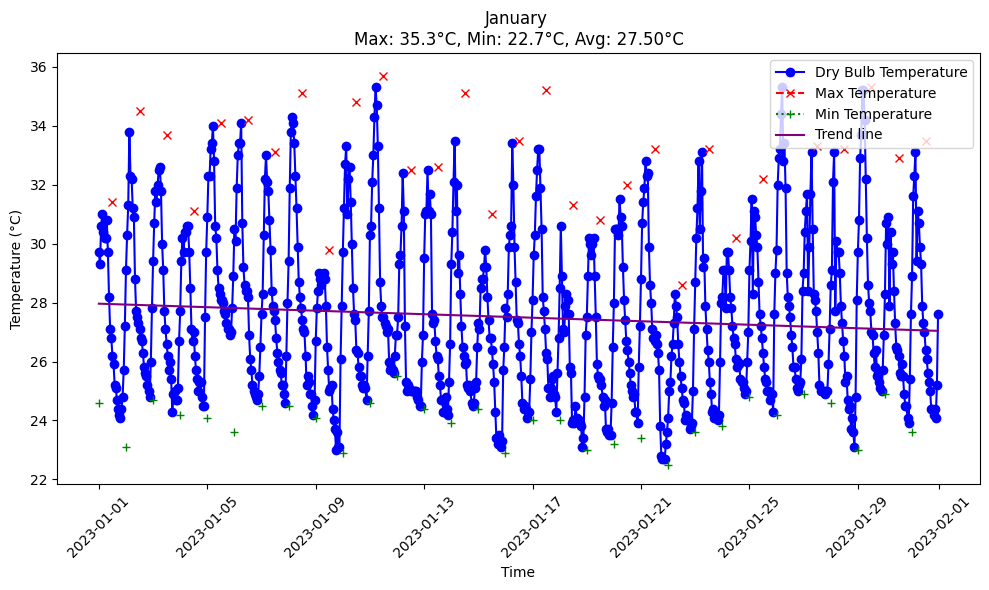

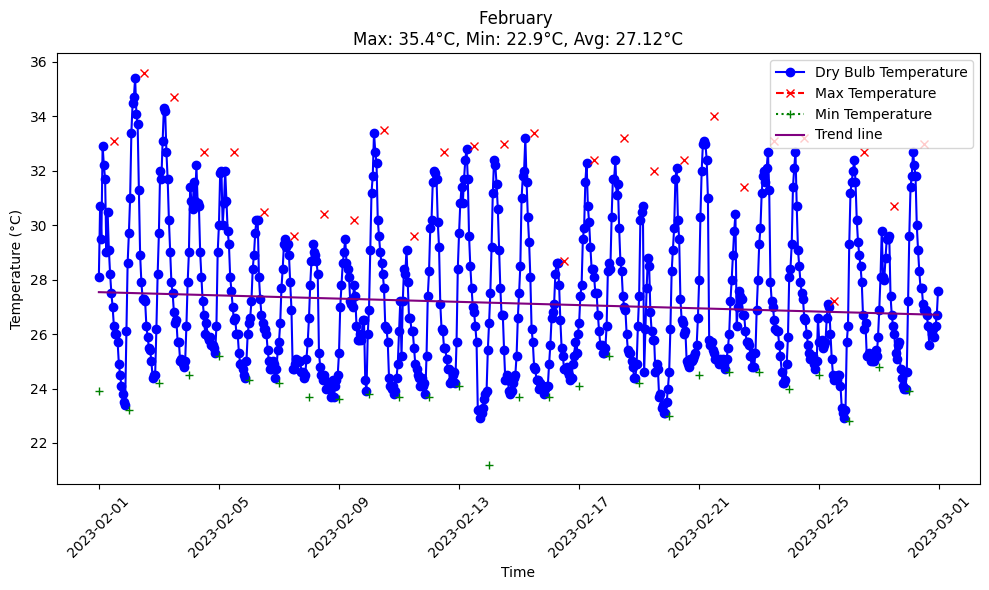

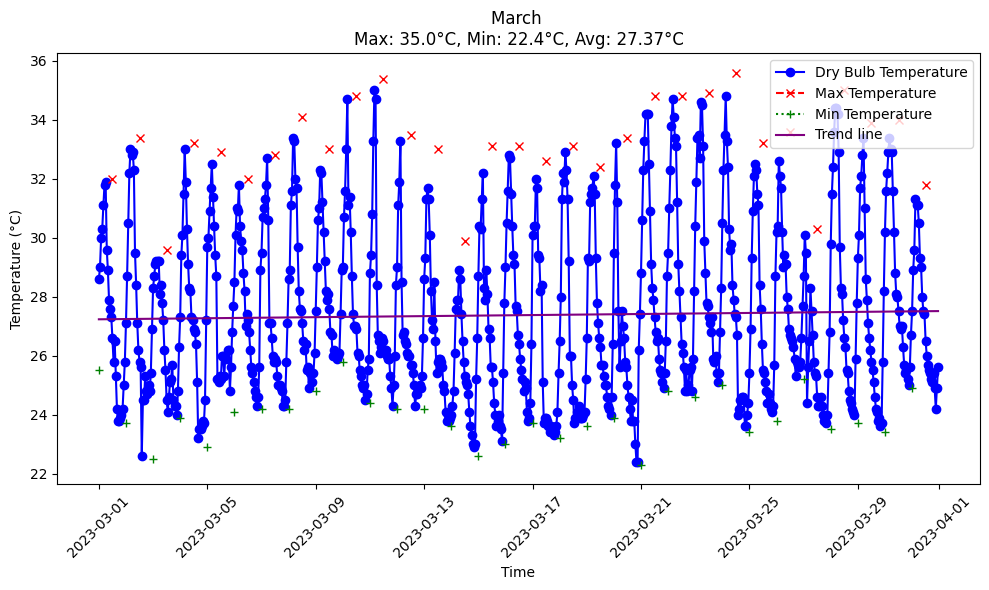

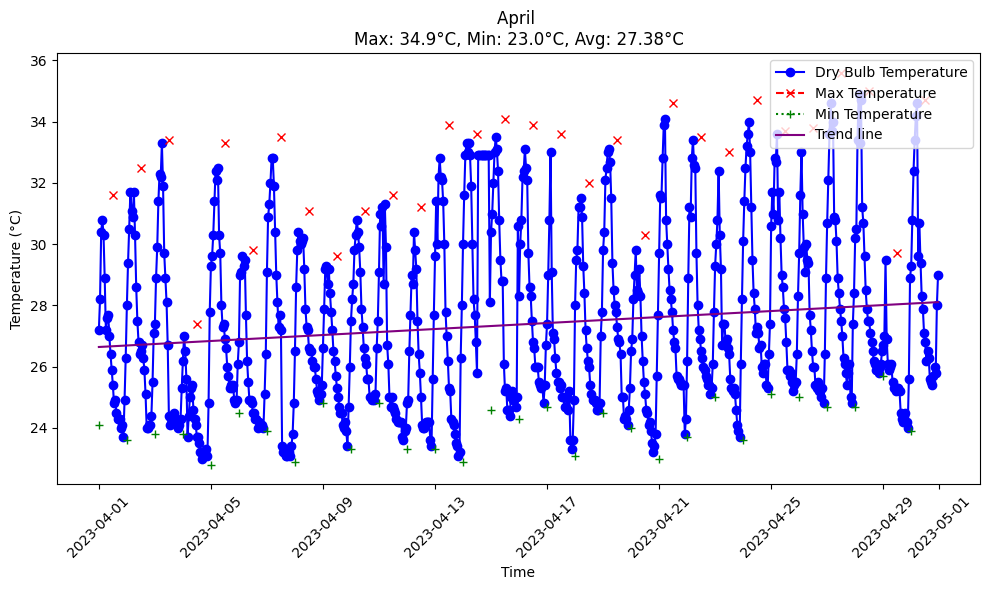

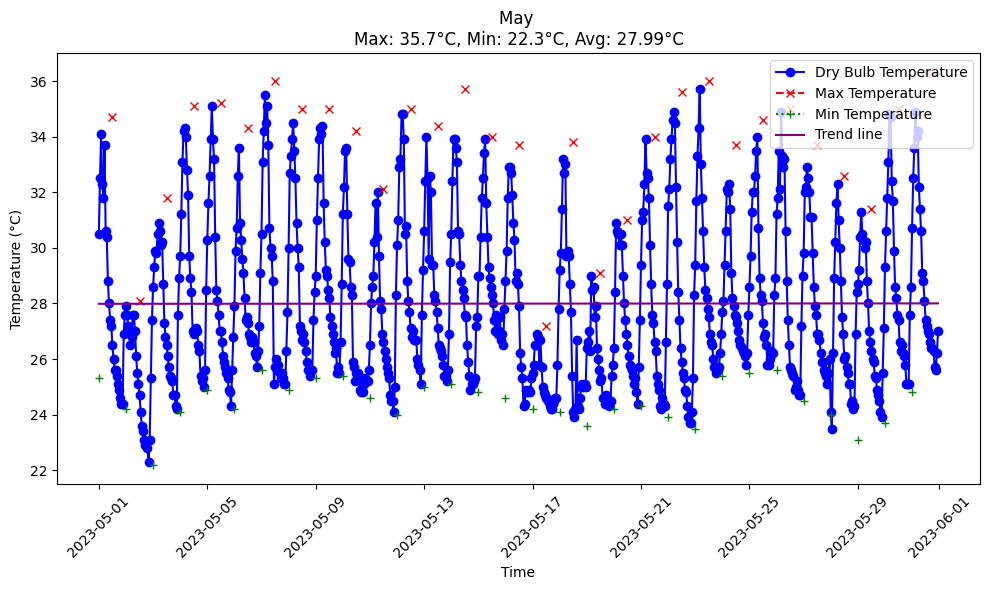

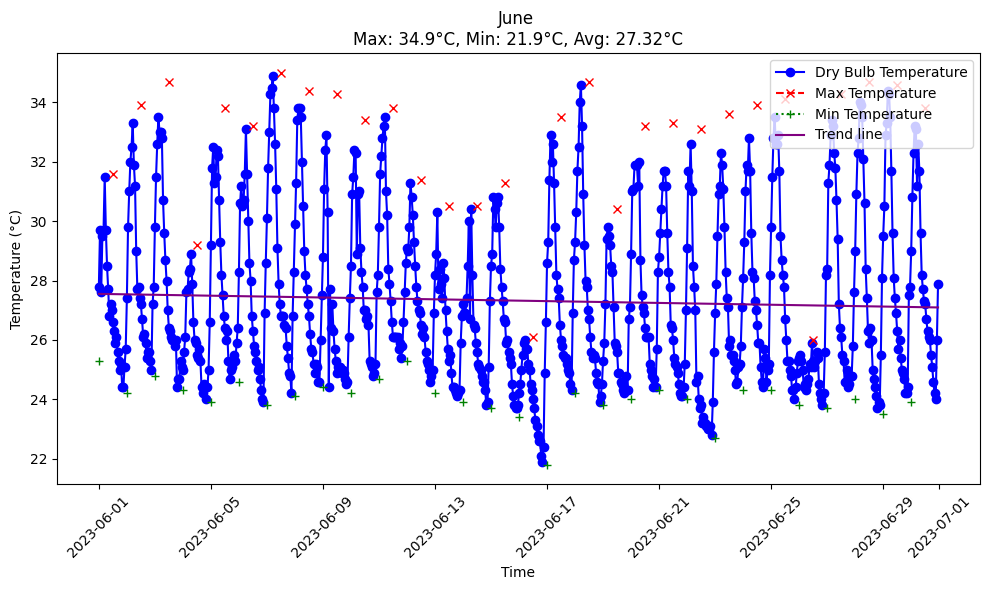

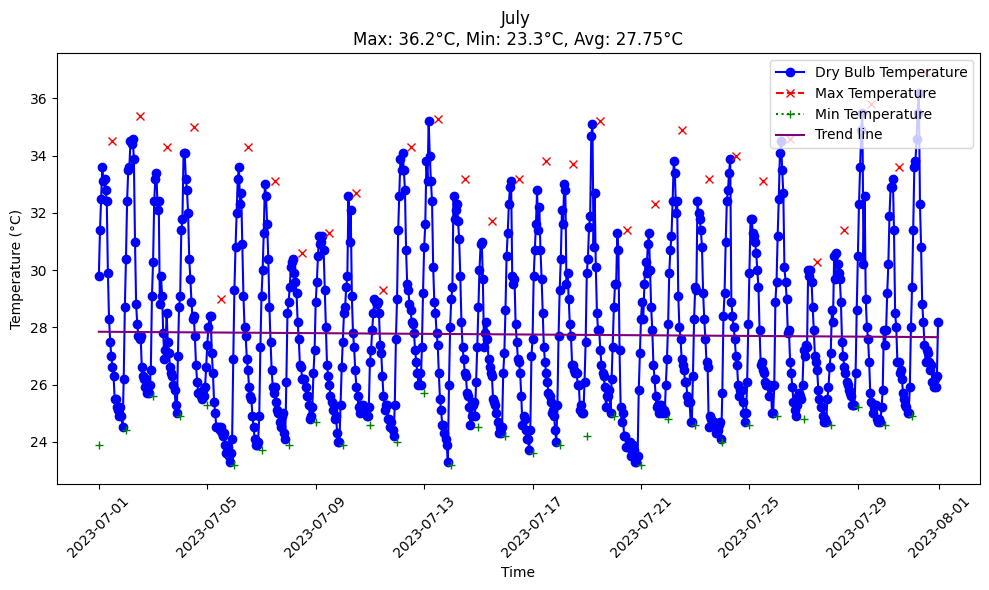

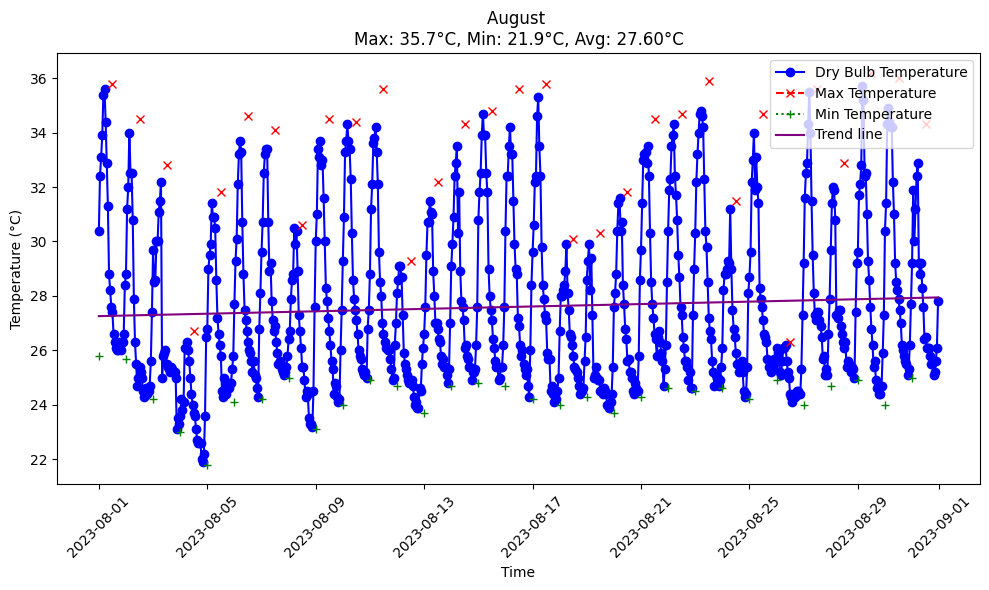

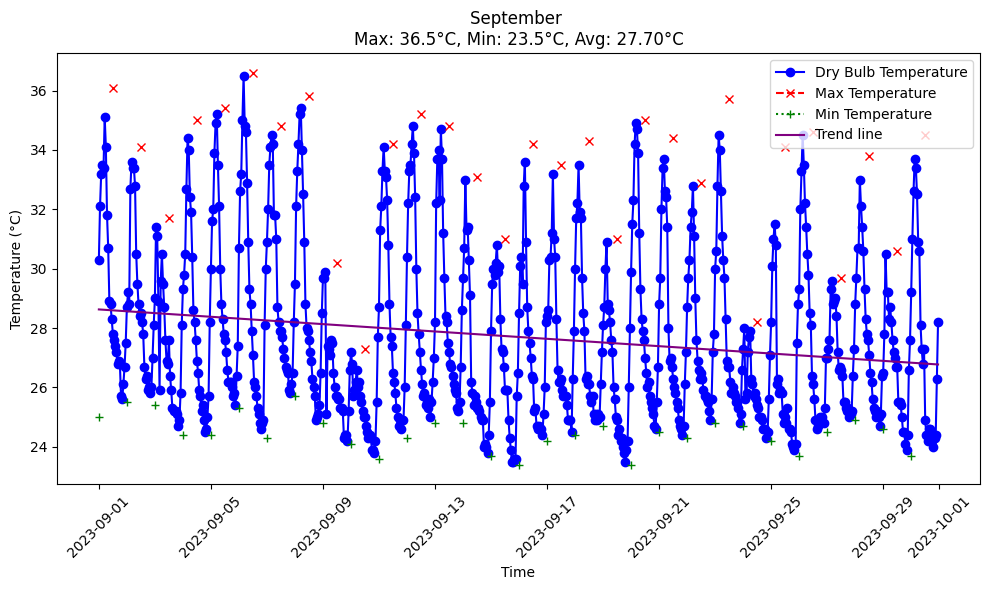

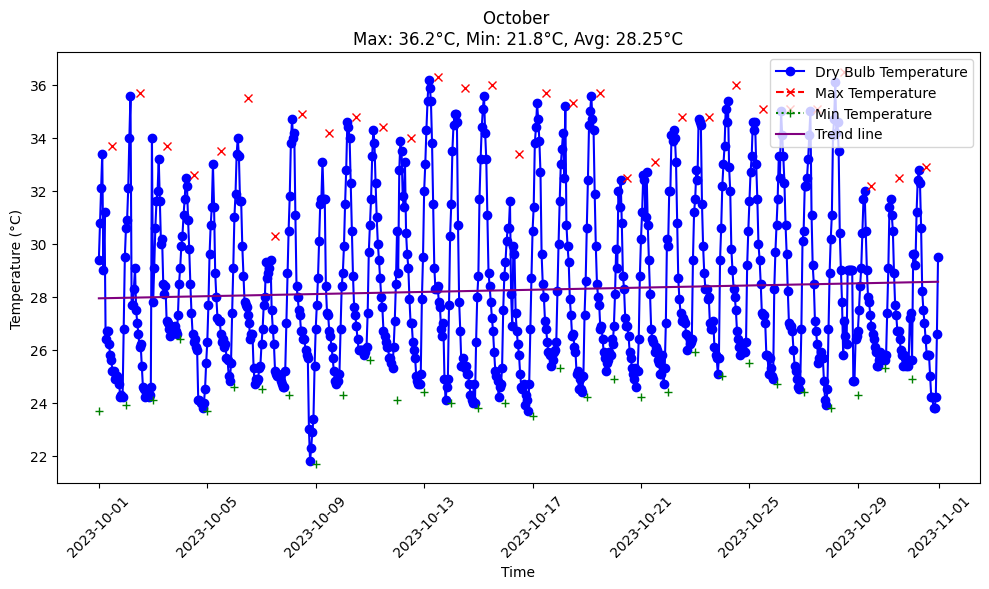

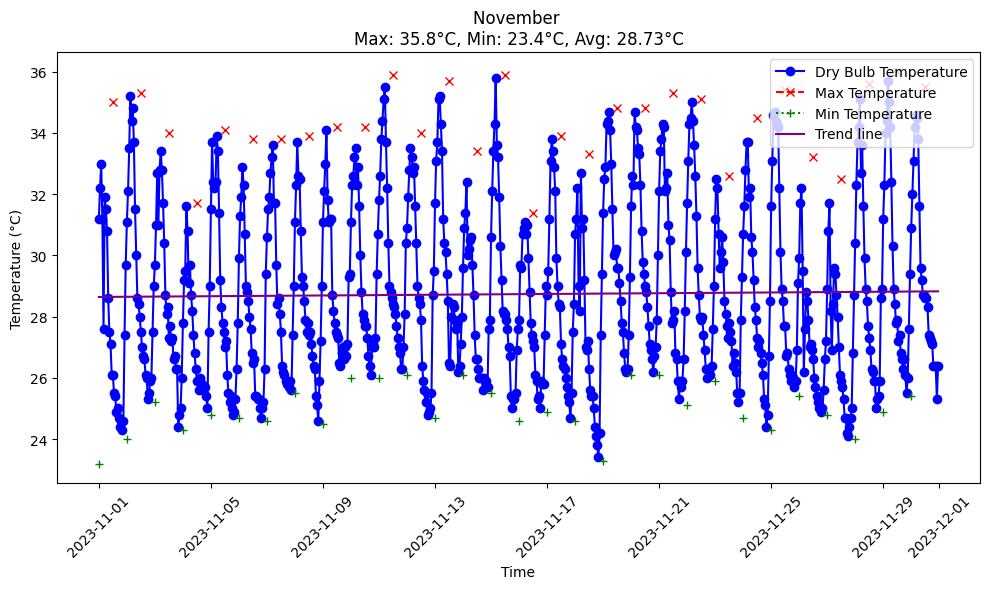

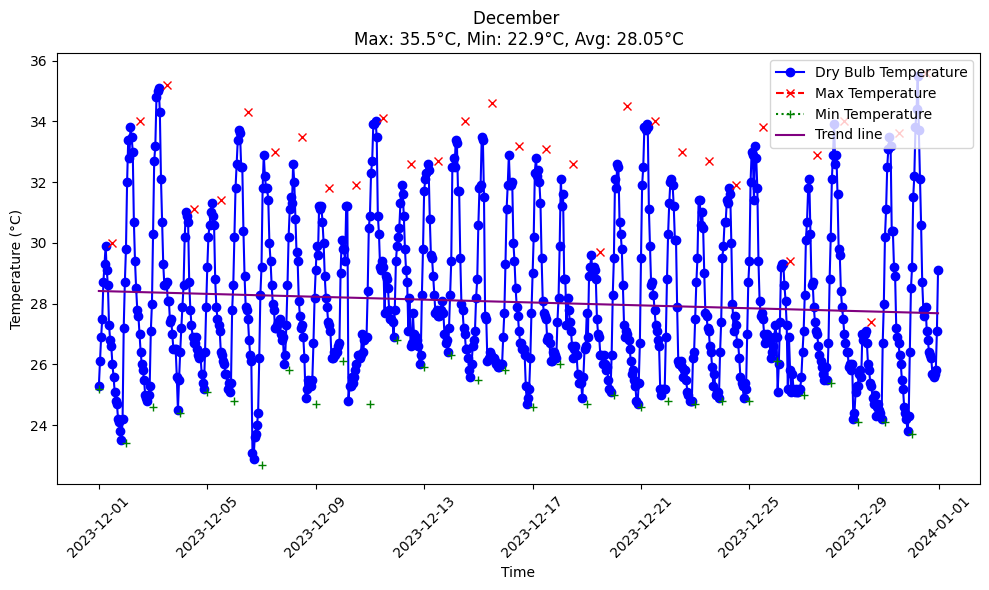

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'TEMP DRYBULB C TTTTTT', 'TEMP MAX C TXTXTX', 'TEMP MIN C TNTNTN'])

# Convert the 'DATA TIMESTAMP' column to datetime format and extract month
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])
df['Month'] = df['DATA TIMESTAMP'].dt.month

# Convert temperatures to numeric, handling errors
df['TEMP DRYBULB C TTTTTT'] = pd.to_numeric(df['TEMP DRYBULB C TTTTTT'], errors='coerce')
df['TEMP MAX C TXTXTX'] = pd.to_numeric(df['TEMP MAX C TXTXTX'], errors='coerce')
df['TEMP MIN C TNTNTN'] = pd.to_numeric(df['TEMP MIN C TNTNTN'], errors='coerce')

# Dictionary to map month number to month name
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

def plot_monthly_temperature(df, month):
    # Filter data for the specified month
    monthly_data = df[df['Month'] == month]
    
    # Plot temperature data
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_data['DATA TIMESTAMP'], monthly_data['TEMP DRYBULB C TTTTTT'], label='Dry Bulb Temperature', marker='o', linestyle='-', color='blue')
    plt.plot(monthly_data['DATA TIMESTAMP'], monthly_data['TEMP MAX C TXTXTX'], label='Max Temperature', marker='x', linestyle='--', color='red')
    plt.plot(monthly_data['DATA TIMESTAMP'], monthly_data['TEMP MIN C TNTNTN'], label='Min Temperature', marker='+', linestyle=':', color='green')
    
    # Calculate and plot trend line for dry bulb temperature
    x = np.arange(len(monthly_data))
    y = monthly_data['TEMP DRYBULB C TTTTTT'].dropna()
    if len(x) > 0 and len(y) > 0:
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        plt.plot(monthly_data['DATA TIMESTAMP'], intercept + slope*x, 'r', label='Trend line', color='purple')
    
    # Display properties
    max_temp = y.max()
    min_temp = y.min()
    avg_temp = y.mean()
    plt.title(f'{month_names[month]} \nMax: {max_temp}°C, Min: {min_temp}°C, Avg: {avg_temp:.2f}°C')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend(loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

for month in range(1, 13):
    plot_monthly_temperature(df, month)

/tmp/ipykernel_2727/775262496.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])


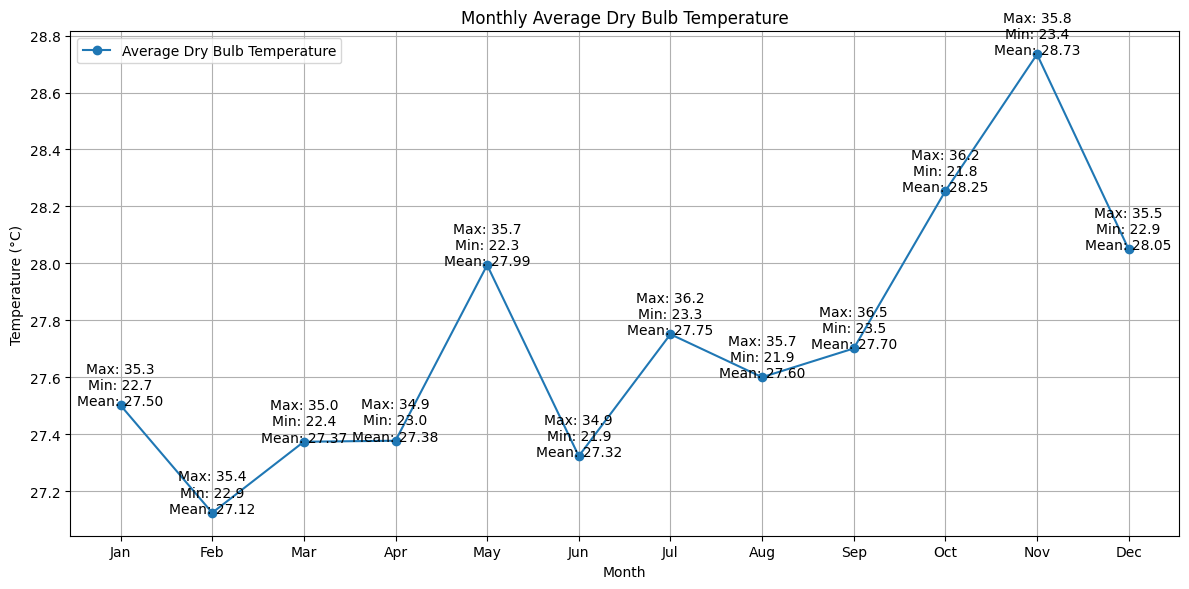

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'TEMP DRYBULB C TTTTTT', 'TEMP MAX C TXTXTX', 'TEMP MIN C TNTNTN'])

# Convert the 'DATA TIMESTAMP' column to datetime format
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])

# Extract month and hour from 'DATA TIMESTAMP'
df['Month'] = df['DATA TIMESTAMP'].dt.month
df['Hour'] = df['DATA TIMESTAMP'].dt.hour

# Ensure temperature columns are numeric
df['TEMP DRYBULB C TTTTTT'] = pd.to_numeric(df['TEMP DRYBULB C TTTTTT'], errors='coerce')
df['TEMP MAX C TXTXTX'] = pd.to_numeric(df['TEMP MAX C TXTXTX'], errors='coerce')
df['TEMP MIN C TNTNTN'] = pd.to_numeric(df['TEMP MIN C TNTNTN'], errors='coerce')

# Group by month and calculate statistics for dry bulb temperature
monthly_stats = df.groupby('Month')['TEMP DRYBULB C TTTTTT'].agg(['mean', 'max', 'min']).reset_index()

plt.figure(figsize=(12, 6))

# Plotting the average dry bulb temperature
plt.plot(monthly_stats['Month'], monthly_stats['mean'], label='Average Dry Bulb Temperature', marker='o', linestyle='-')

# Adding statistical annotations
for i, row in monthly_stats.iterrows():
    plt.text(row['Month'], row['mean'], f"Max: {row['max']}\nMin: {row['min']}\nMean: {row['mean']:.2f}", ha='center')

plt.title('Monthly Average Dry Bulb Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2727/371975543.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])
/tmp/ipykernel_2727/371975543.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['TEMP DRYBULB C TTTTTT'] = pd.to_numeric(filtered_df['TEMP DRYBULB C TTTTTT'], errors='coerce')


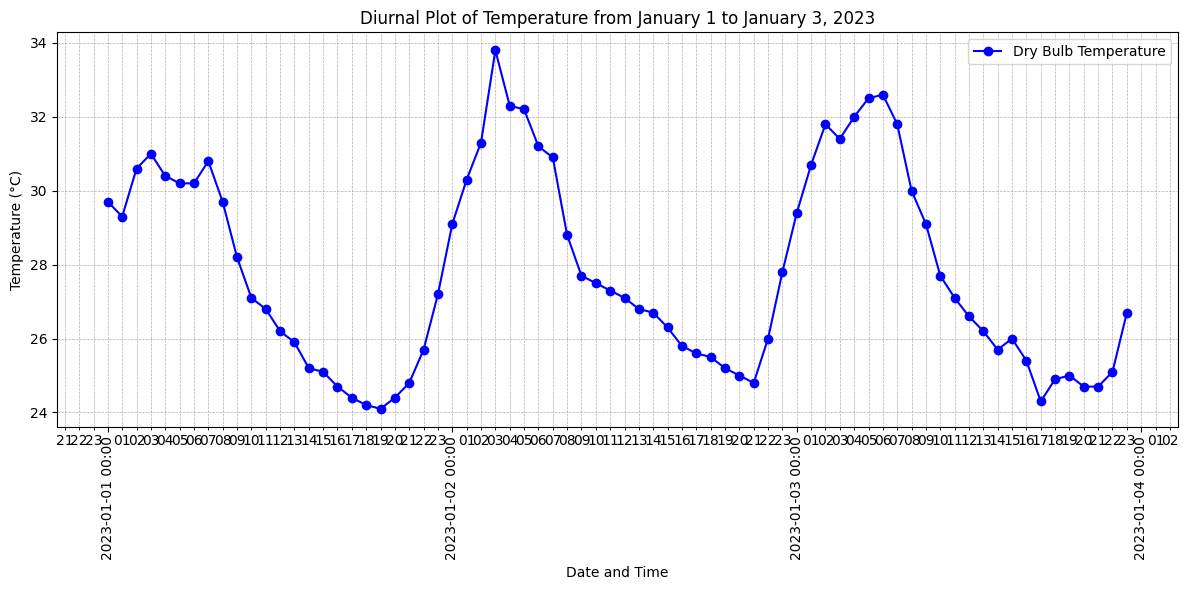

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'TEMP DRYBULB C TTTTTT'])

# Convert the 'DATA TIMESTAMP' column to datetime format
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])

# Filter the data for January 1 to January 3, 2023
mask = (df['DATA TIMESTAMP'] >= '2023-01-01 00:00:00') & (df['DATA TIMESTAMP'] <= '2023-01-03 23:59:59')
filtered_df = df.loc[mask]

# Ensure temperature is numeric
filtered_df['TEMP DRYBULB C TTTTTT'] = pd.to_numeric(filtered_df['TEMP DRYBULB C TTTTTT'], errors='coerce')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['DATA TIMESTAMP'], filtered_df['TEMP DRYBULB C TTTTTT'], label='Dry Bulb Temperature', marker='o', linestyle='-', color='blue')

# Formatting the plot
plt.title('Diurnal Plot of Temperature from January 1 to January 3, 2023')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%H'))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_2727/903710802.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])
/tmp/ipykernel_2727/903710802.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['WIND DIR DEG DD'] = pd.to_numeric(season_df['WIND DIR DEG DD'], errors='coerce')
/tmp/ipykernel_2727/903710802.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

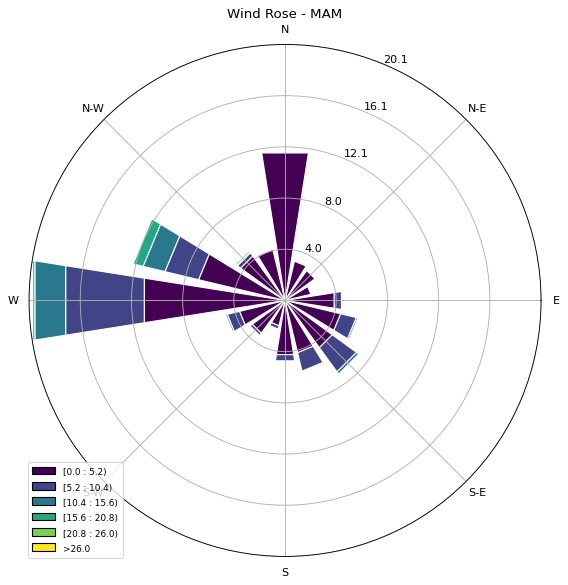

/tmp/ipykernel_2727/903710802.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['WIND DIR DEG DD'] = pd.to_numeric(season_df['WIND DIR DEG DD'], errors='coerce')
/tmp/ipykernel_2727/903710802.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['WIND SPEED FF'] = pd.to_numeric(season_df['WIND SPEED FF'], errors='coerce')
/tmp/ipykernel_2727/903710802.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

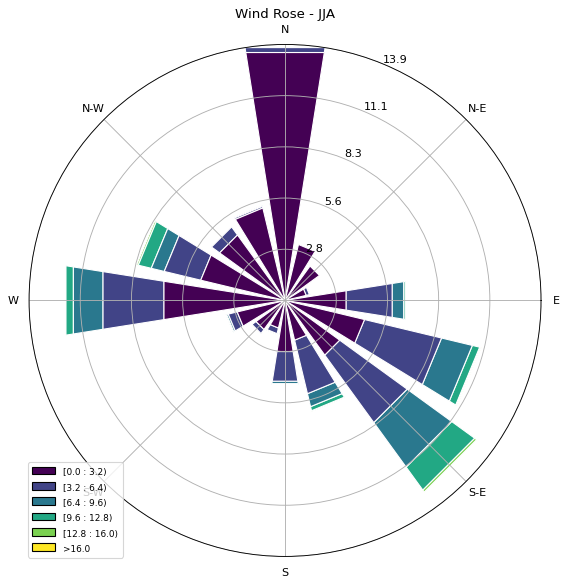

/tmp/ipykernel_2727/903710802.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['WIND DIR DEG DD'] = pd.to_numeric(season_df['WIND DIR DEG DD'], errors='coerce')
/tmp/ipykernel_2727/903710802.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['WIND SPEED FF'] = pd.to_numeric(season_df['WIND SPEED FF'], errors='coerce')
/tmp/ipykernel_2727/903710802.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

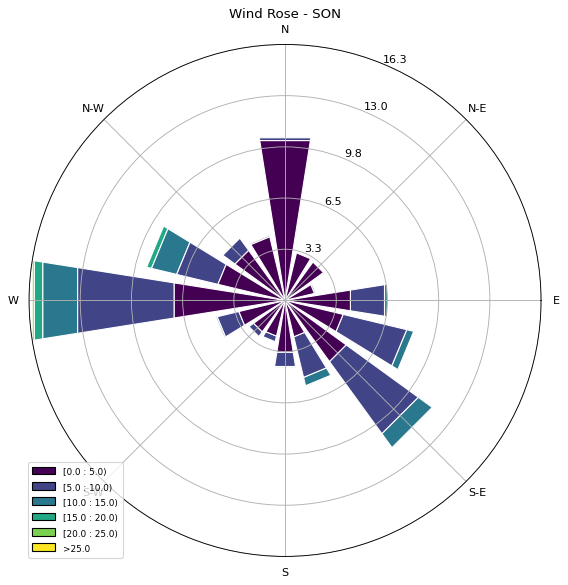

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'WIND DIR DEG DD', 'WIND SPEED FF'])

# Convert the 'DATA TIMESTAMP' column to datetime format
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])

# Extract month from the timestamp for seasonal separation
df['MONTH'] = df['DATA TIMESTAMP'].dt.month

# Function to plot windrose
def plot_windrose(season_df, season_name):
    # Ensure data types are correct
    season_df['WIND DIR DEG DD'] = pd.to_numeric(season_df['WIND DIR DEG DD'], errors='coerce')
    season_df['WIND SPEED FF'] = pd.to_numeric(season_df['WIND SPEED FF'], errors='coerce')
    
    # Drop rows with NaN values in either column
    season_df.dropna(subset=['WIND DIR DEG DD', 'WIND SPEED FF'], inplace=True)
    
    # Create windrose plot
    ax = WindroseAxes.from_ax()
    ax.bar(season_df['WIND DIR DEG DD'], season_df['WIND SPEED FF'], normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    plt.title(f'Wind Rose - {season_name}')
    plt.show()

# Filter data for each season
mam_df = df[df['MONTH'].isin([3, 4, 5])]
jja_df = df[df['MONTH'].isin([6, 7, 8])]
son_df = df[df['MONTH'].isin([9, 10, 11])]

# Plot windrose for each season
plot_windrose(mam_df, 'MAM')
plot_windrose(jja_df, 'JJA')
plot_windrose(son_df, 'SON')

/tmp/ipykernel_2727/1257304381.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])


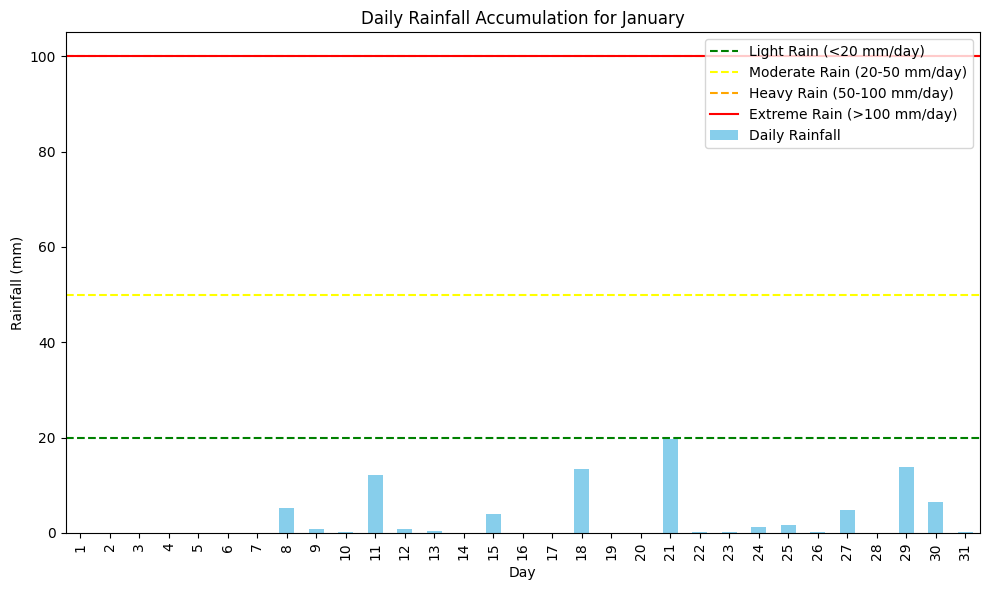

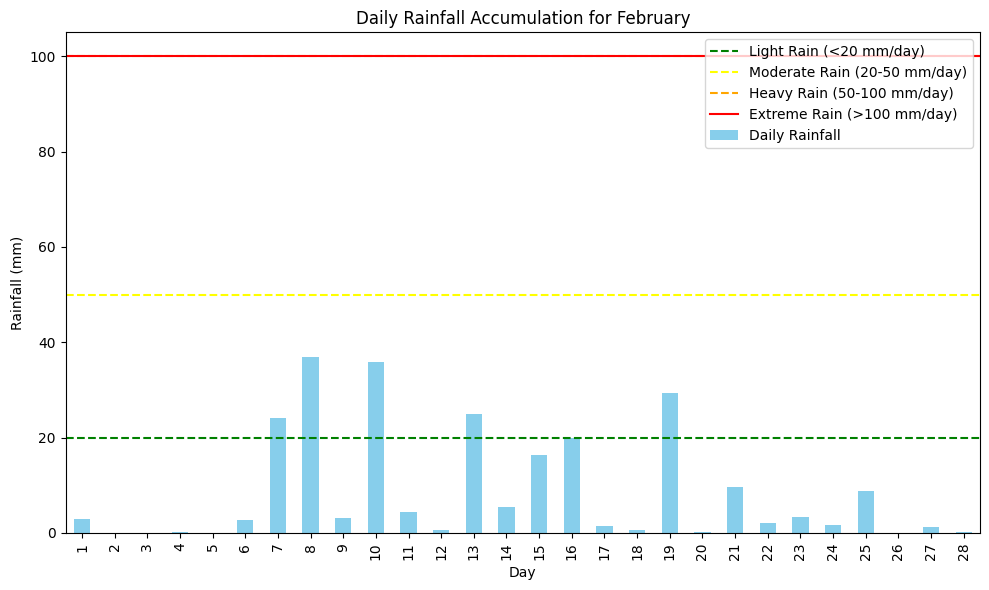

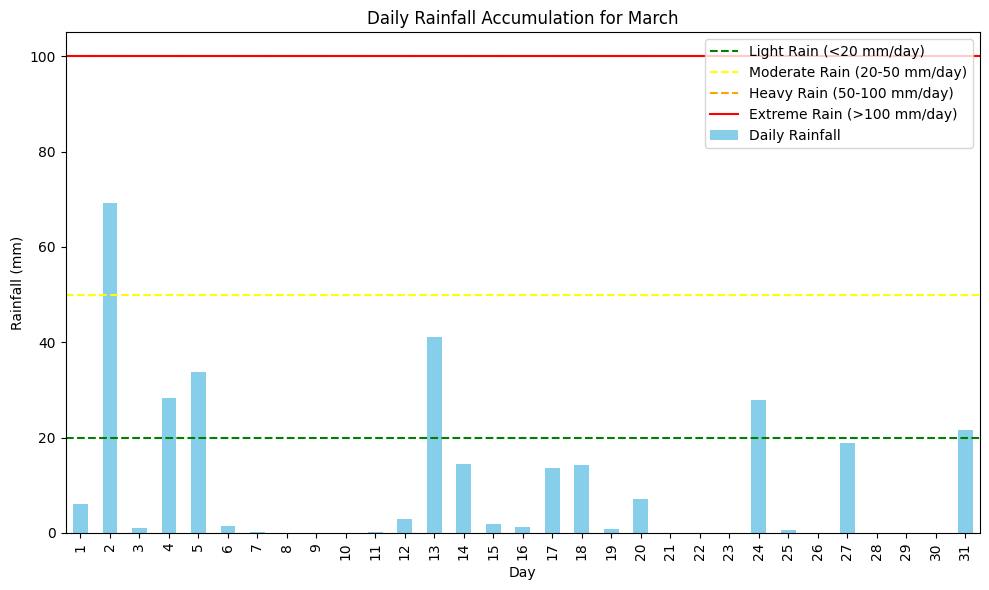

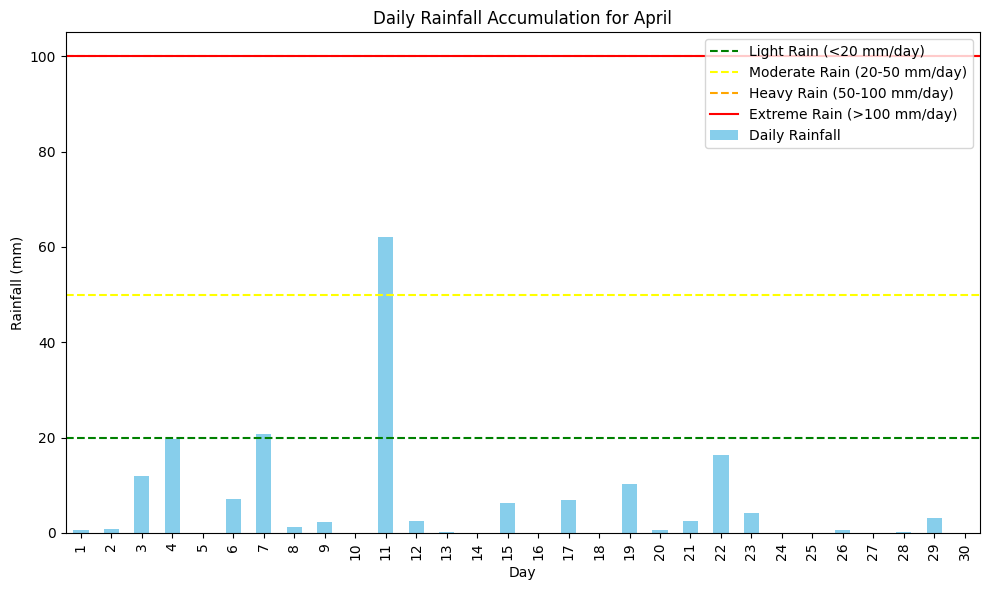

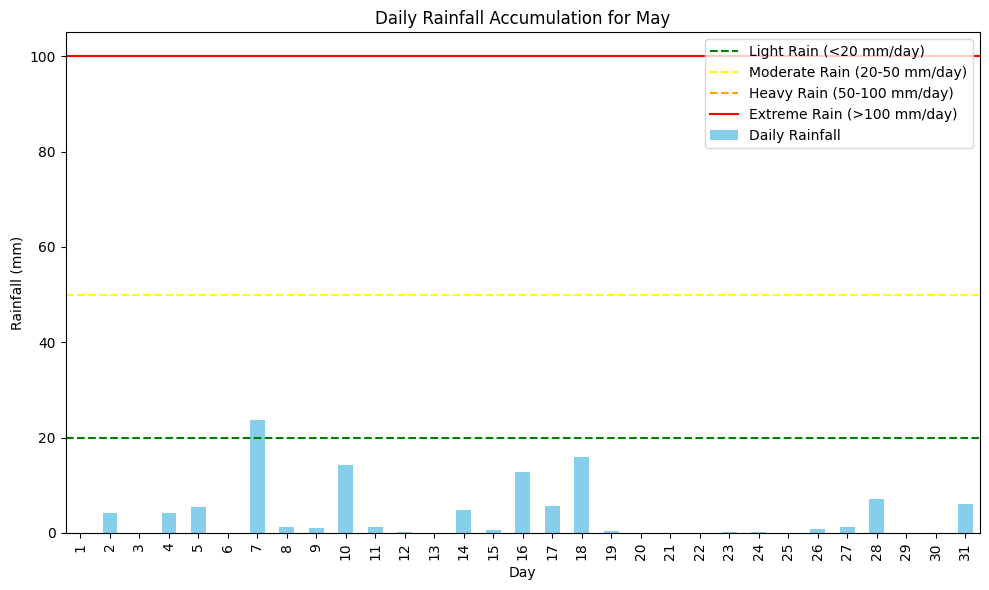

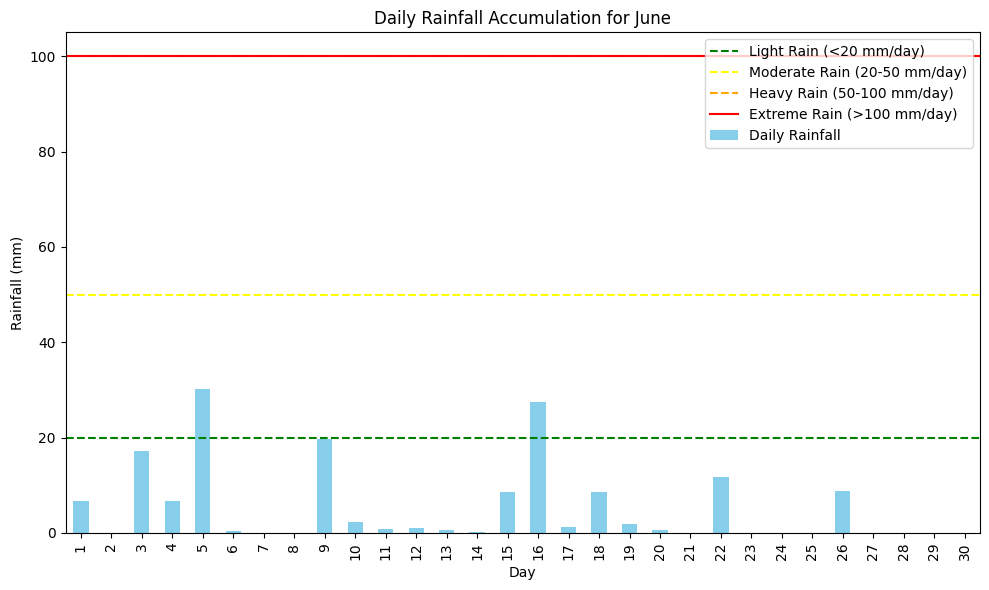

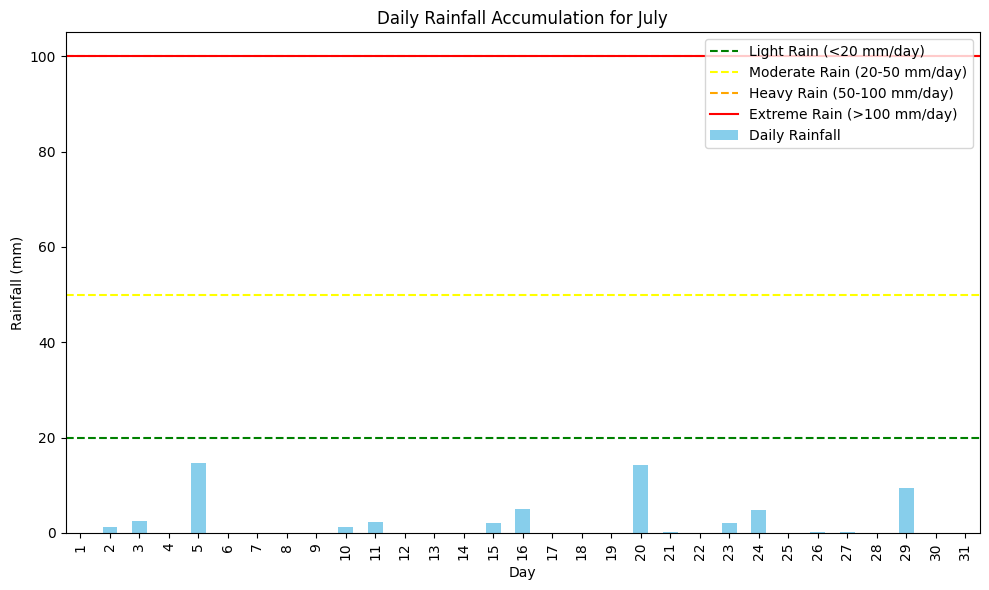

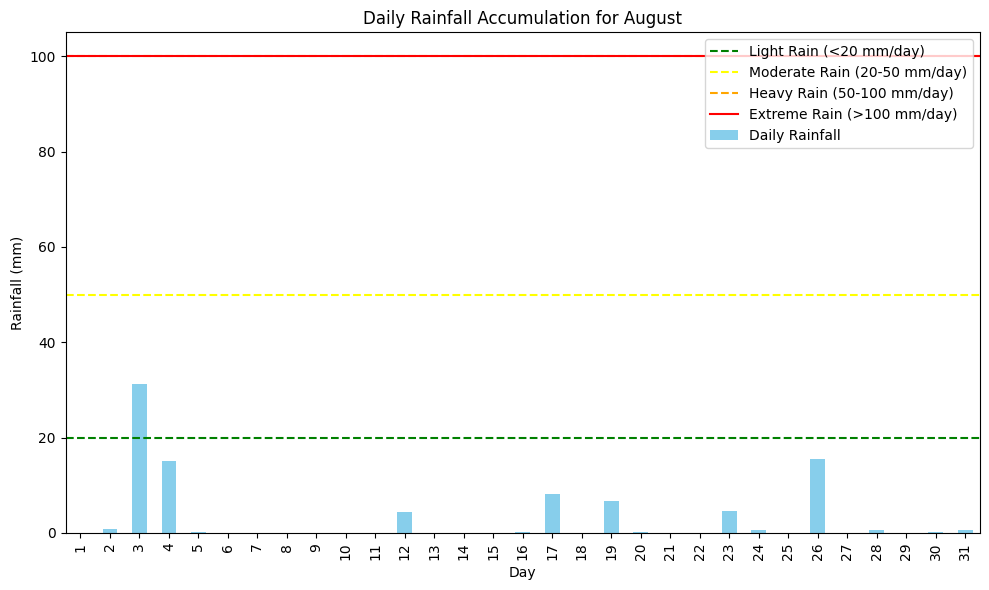

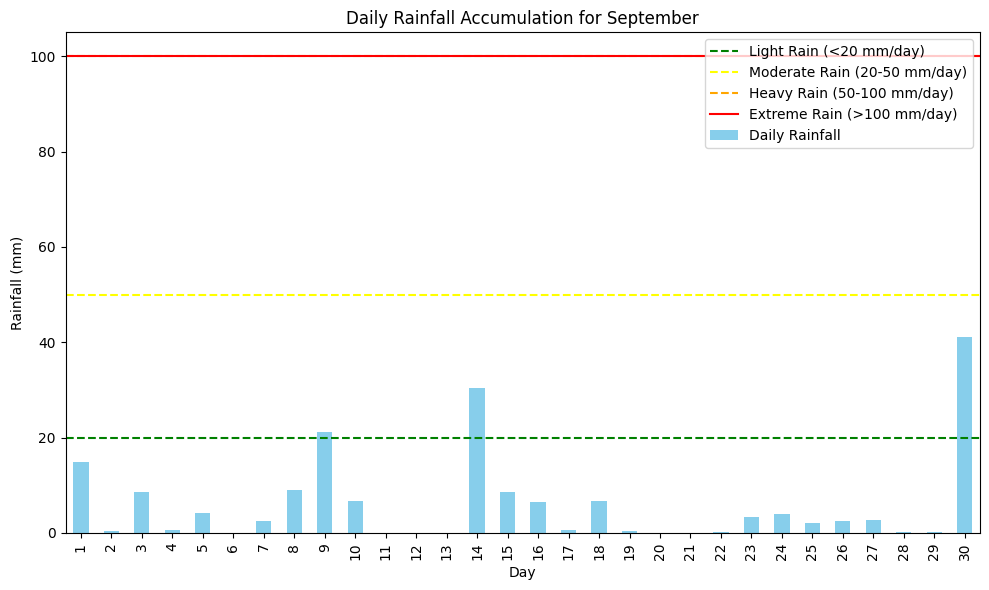

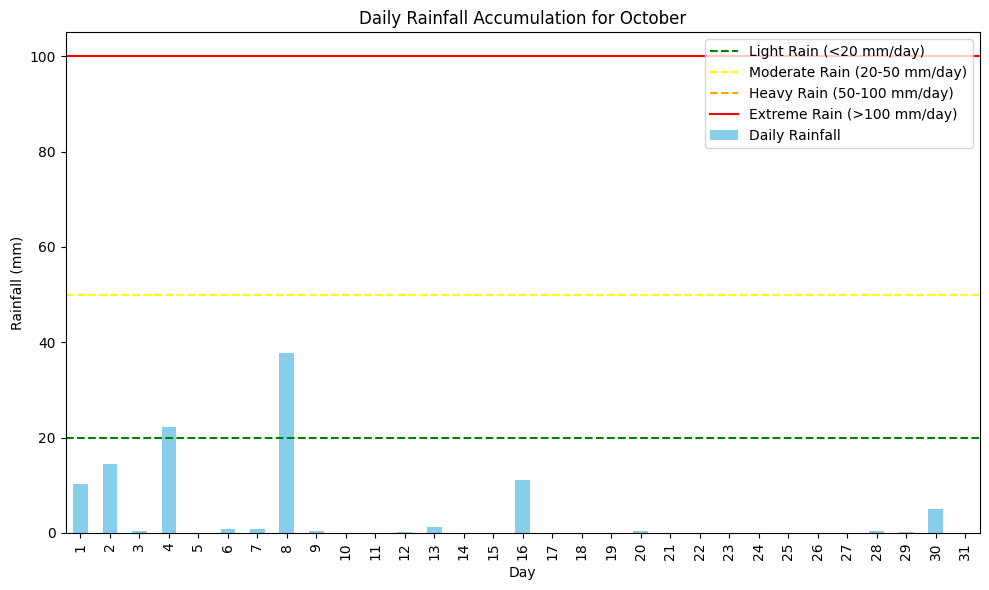

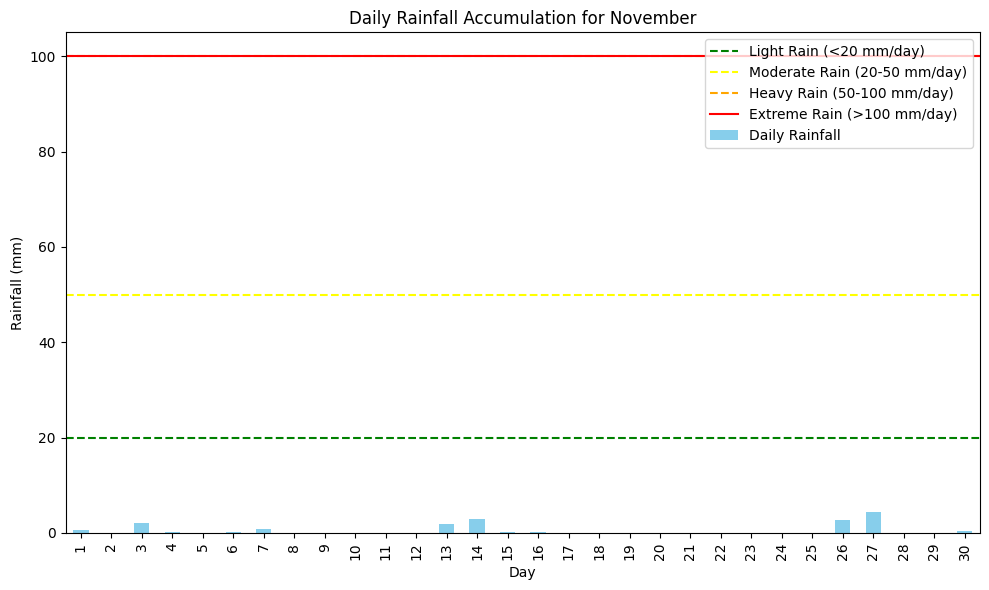

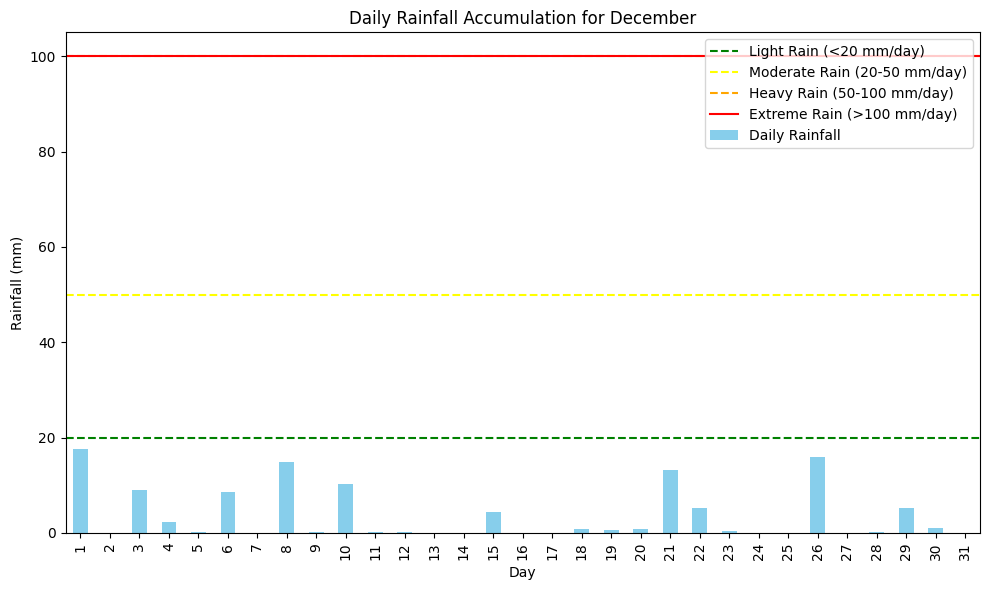

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'RAINFALL LAST MM'])

# Convert 'DATA TIMESTAMP' to datetime and extract month and day
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])
df['Month'] = df['DATA TIMESTAMP'].dt.month
df['Day'] = df['DATA TIMESTAMP'].dt.day

# Replace 8888 with 0 and convert to numeric
df['RAINFALL LAST MM'] = df['RAINFALL LAST MM'].replace(8888, 0)
df['RAINFALL LAST MM'] = pd.to_numeric(df['RAINFALL LAST MM'], errors='coerce').fillna(0)

# Function to plot daily rainfall for a given month
def plot_daily_rainfall_for_month(month_number):
    # Filter data for the specified month
    monthly_data = df[df['Month'] == month_number]
    
    # Accumulate daily rainfall
    daily_rainfall = monthly_data.groupby('Day')['RAINFALL LAST MM'].sum()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    daily_rainfall.plot(kind='bar', color='skyblue', label='Daily Rainfall')
    
    # Adding horizontal lines for rainfall classification
    plt.axhline(20, color='green', linestyle='--', label='Light Rain (<20 mm/day)')
    plt.axhline(50, color='yellow', linestyle='--', label='Moderate Rain (20-50 mm/day)')
    plt.axhline(100, color='orange', linestyle='--', label='Heavy Rain (50-100 mm/day)')
    plt.axhline(100, color='red', linestyle='-', label='Extreme Rain (>100 mm/day)')
    
    plt.title(f'Daily Rainfall Accumulation for {calendar.month_name[month_number]}')
    plt.xlabel('Day')
    plt.ylabel('Rainfall (mm)')
    plt.legend(loc='upper right')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Plot daily rainfall for each month
for month in range(1, 13):
    plot_daily_rainfall_for_month(month)

/tmp/ipykernel_2727/2388918836.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])


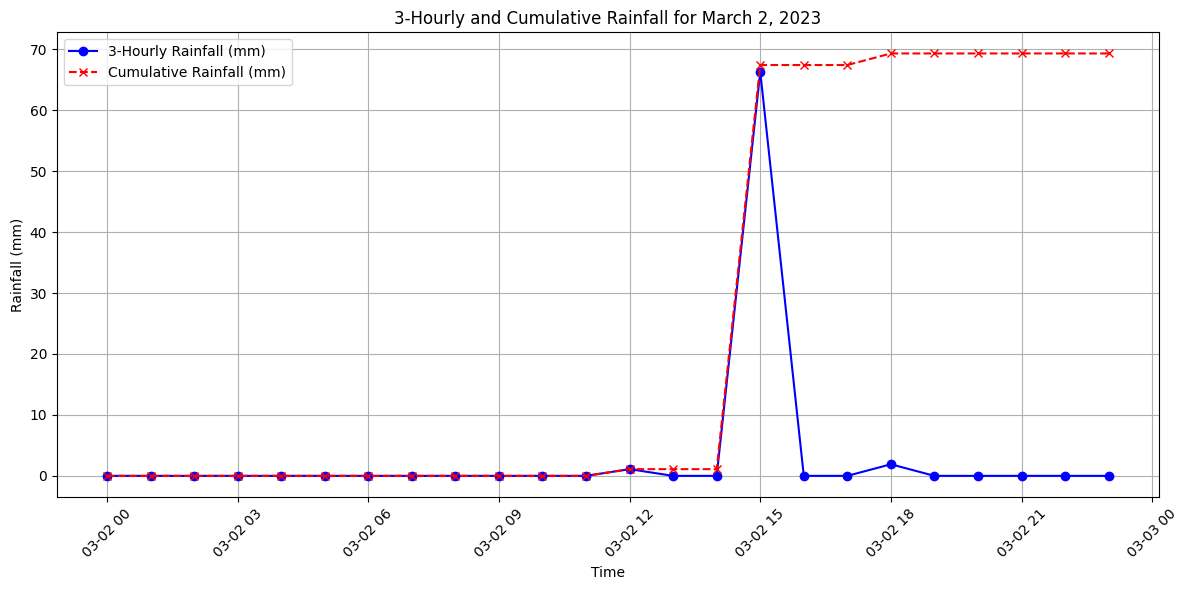

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'RAINFALL LAST MM'])

# Convert 'DATA TIMESTAMP' to datetime and filter for March 2, 2023
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])
df = df[(df['DATA TIMESTAMP'] >= '2023-03-02 00:00:00') & (df['DATA TIMESTAMP'] <= '2023-03-02 23:59:59')]

# Replace 8888 with 0 and convert to numeric
df['RAINFALL LAST MM'] = df['RAINFALL LAST MM'].replace(8888, 0)
df['RAINFALL LAST MM'] = pd.to_numeric(df['RAINFALL LAST MM'], errors='coerce').fillna(0)

# Calculate the cumulative sum of rainfall
df['CUMULATIVE RAINFALL'] = df['RAINFALL LAST MM'].cumsum()

# Plotting
plt.figure(figsize=(12, 6))

# Plot 3-hourly rainfall data
plt.plot(df['DATA TIMESTAMP'], df['RAINFALL LAST MM'], label='3-Hourly Rainfall (mm)', marker='o', linestyle='-', color='blue')

# Plot cumulative rainfall data
plt.plot(df['DATA TIMESTAMP'], df['CUMULATIVE RAINFALL'], label='Cumulative Rainfall (mm)', marker='x', linestyle='--', color='red')

# Formatting the plot
plt.title('3-Hourly and Cumulative Rainfall for March 2, 2023')
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_2727/1142212653.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])


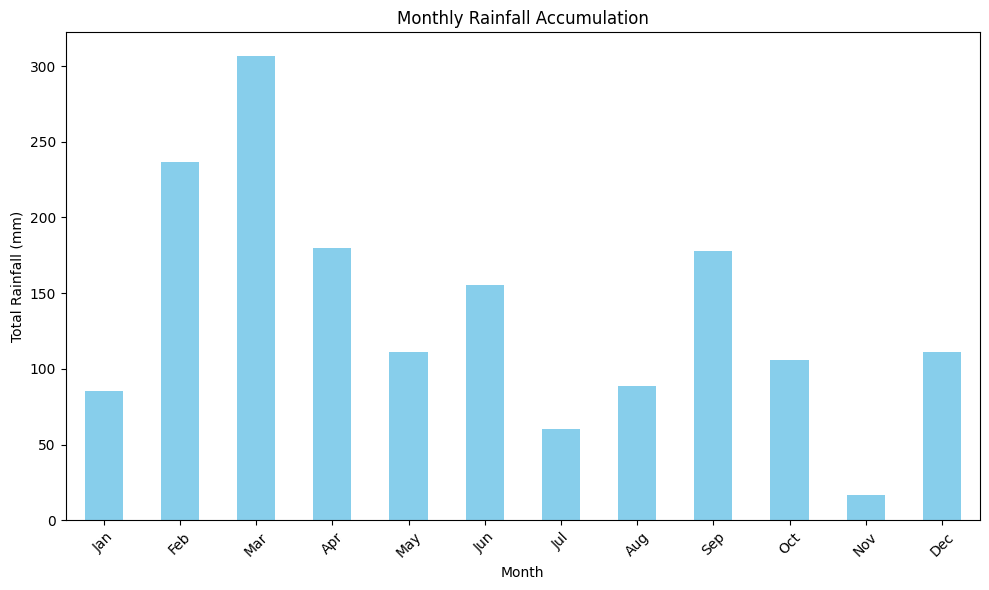

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'RAINFALL LAST MM'])

# Convert 'DATA TIMESTAMP' to datetime format
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])

# Extract month from 'DATA TIMESTAMP'
df['Month'] = df['DATA TIMESTAMP'].dt.month

# Replace 8888 with 0 in 'RAINFALL LAST MM'
df['RAINFALL LAST MM'] = df['RAINFALL LAST MM'].replace(8888, 0)

# Convert 'RAINFALL LAST MM' to numeric, just in case it's not
df['RAINFALL LAST MM'] = pd.to_numeric(df['RAINFALL LAST MM'], errors='coerce').fillna(0)

# Group by month and sum the rainfall
monthly_rainfall = df.groupby('Month')['RAINFALL LAST MM'].sum()

# Plotting
plt.figure(figsize=(10, 6))
monthly_rainfall.plot(kind='bar', color='skyblue')
plt.title('Monthly Rainfall Accumulation')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_4515/1608786062.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])


ValueError: The number of FixedLocator locations (24), usually from a call to set_ticks, does not match the number of labels (12).

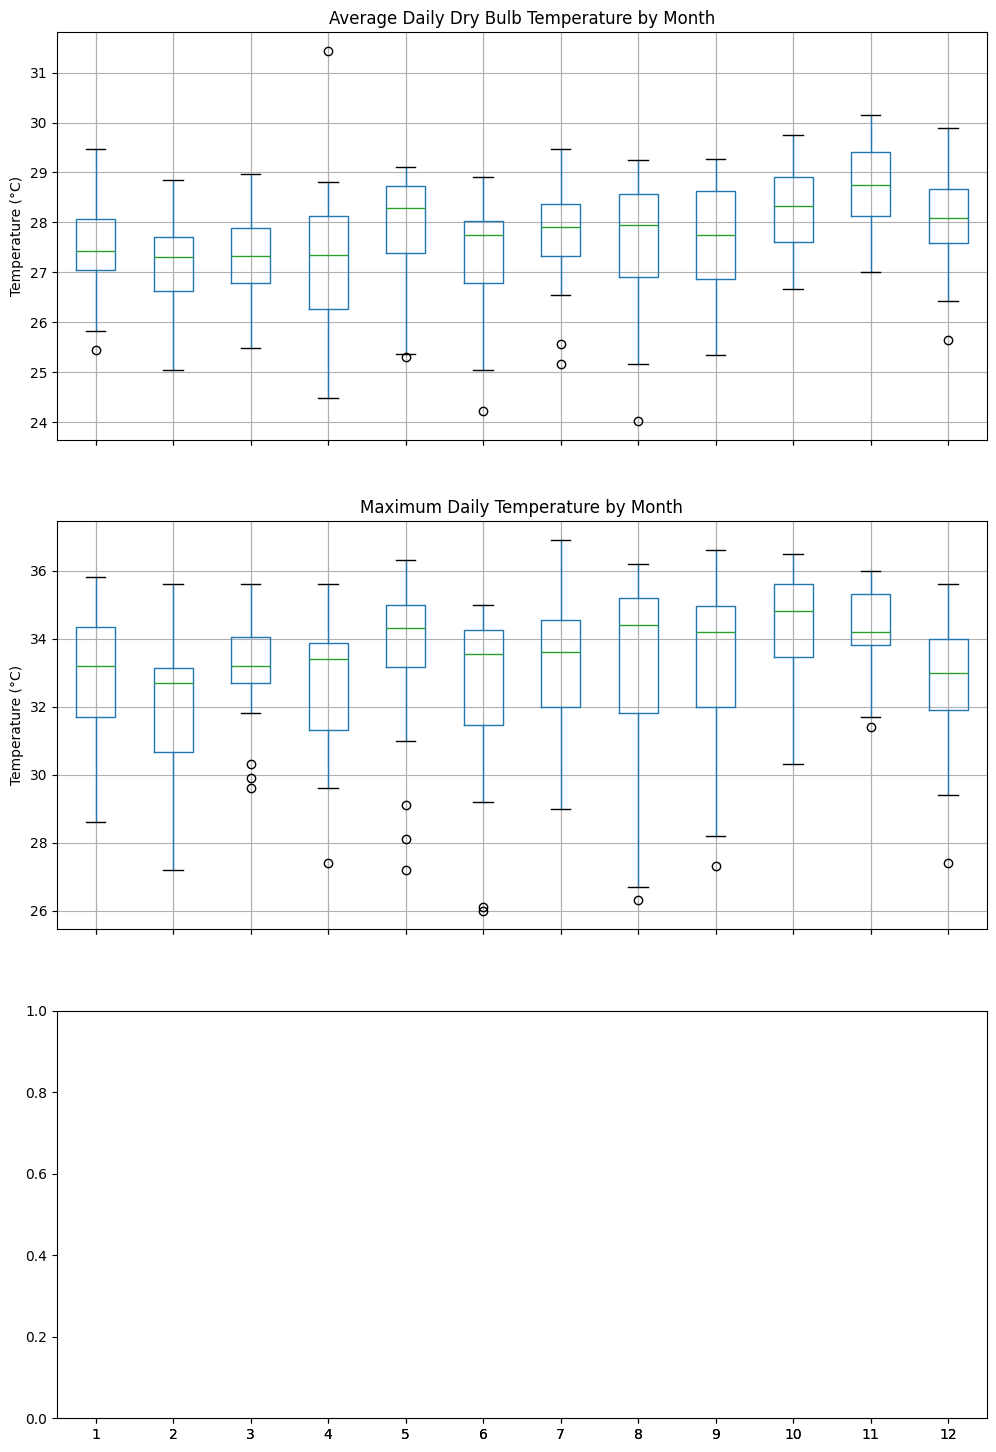

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar  

# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'TEMP DRYBULB C TTTTTT', 'TEMP MAX C TXTXTX', 'TEMP MIN C TNTNTN'])

# Convert 'DATA TIMESTAMP' to datetime and extract month and day
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])
df['Month'] = df['DATA TIMESTAMP'].dt.month
df['Day'] = df['DATA TIMESTAMP'].dt.day

# Replace special values and convert temperatures to numeric
df['TEMP DRYBULB C TTTTTT'] = pd.to_numeric(df['TEMP DRYBULB C TTTTTT'], errors='coerce')
df['TEMP MAX C TXTXTX'] = pd.to_numeric(df['TEMP MAX C TXTXTX'], errors='coerce')
df['TEMP MIN C TNTNTN'] = pd.to_numeric(df['TEMP MIN C TNTNTN'], errors='coerce')

# Group by month and day to calculate daily averages, minimums, and maximums
daily_stats = df.groupby(['Month', 'Day']).agg({
    'TEMP DRYBULB C TTTTTT': 'mean',
    'TEMP MAX C TXTXTX': 'max',
    'TEMP MIN C TNTNTN': 'min'
}).reset_index()

# Pivot the data for boxplot compatibility
daily_avg = daily_stats.pivot(index='Day', columns='Month', values='TEMP DRYBULB C TTTTTT')
daily_max = daily_stats.pivot(index='Day', columns='Month', values='TEMP MAX C TXTXTX')
daily_min = daily_stats.pivot(index='Day', columns='Month', values='TEMP MIN C TNTNTN')

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Average Temperature
daily_avg.boxplot(ax=axes[0])
axes[0].set_title('Average Daily Dry Bulb Temperature by Month')
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])

# Max Temperature
daily_max.boxplot(ax=axes[1])
axes[1].set_title('Maximum Daily Temperature by Month')
axes[1].set_ylabel('Temperature (°C)')
axes[1].set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])

# Min Temperature
daily_min.boxplot(ax=axes[2])
axes[2].set_title('Minimum Daily Temperature by Month')
axes[2].set_ylabel('Temperature (°C)')
axes[2].set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])

plt.tight_layout()
plt.show()